In [1]:
from astropy.io import fits, ascii
from astropy.table import Table
import numpy as np
import rafias_lib as rl
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

In [38]:
def stability_metric(a1_center, b4_center, r, r_in, r_out, a1_hdu, b4_hdu, rf = True):
    data = []
    a1_data = rl.time_series(a1_center[1], a1_center[2], a1_hdu, r, r_in, r_out, red = rf)
    b4_data = rl.time_series(b4_center[1], b4_center[2], b4_hdu, r, r_in, r_out, red = rf)
    a1_res_dtrnd = rl.linear_bestfit(a1_data['time'], a1_data['res_flux'], 0.00002, 1)
    b4_res_dtrnd = rl.linear_bestfit(b4_data['time'], b4_data['res_flux'], 0.00002, 1)
    av_res_dtrnd = (a1_res_dtrnd+b4_res_dtrnd)/2
    data.append(av_res_dtrnd)
    stdev = np.std(av_res_dtrnd/np.median(av_res_dtrnd))
    return stdev*1e6, data

In [17]:
test = ['SUB', 'SUB640', 'FULL1', 'FULL2', 'FULL3', 'FULL4', 'FULL5']
some = np.load('filenames.npy')
centers = np.load('centers.npy')

In [35]:
reload(rl)

<module 'rafias_lib' from 'rafias_lib.py'>

In [36]:
no = rl.fname_generator(test, 2, mmm = 'no_ref_raw_separated_MMM')
full = rl.fname_generator(test, 2, mmm = 'full_ref_raw_separated_MMM')

In [54]:
stdev = Table(names = ('Test', 'No ref', 'Some ref', 'Full ref'), dtype = ('S8', 'f8', 'f8', 'f8'))
no_dt, full_dt, some_dt = [], [], []
for i, t in enumerate(test):
    
    even = 2*i          # a1 tests
    odd = even + 1      # b4 tests
    rfile = False if (i < 2) else True 
    
    no_stdev, data1 = stability_metric(centers[even], centers[odd], 70, 72, 80, no[even], no[odd], rf  = rfile)
    some_stdev, data2 = stability_metric(centers[even], centers[odd], 70, 72, 80, some[even], some[odd], rf  = rfile)
    full_stdev, data3 = stability_metric(centers[even], centers[odd], 70, 72, 80, full[even], full[odd], rf  = rfile)
    
    no_dt.append(data1)
    some_dt.append(data2)
    full_dt.append(data3)
    
    stdev.add_row([t, no_stdev, some_stdev, full_stdev])

In [55]:
stdev

Test,No ref,Some ref,Full ref
str8,float64,float64,float64
SUB,499.327002793,499.371763522,499.327002793
SUB640,1206.82758713,1206.9736384,1206.82758713
FULL1,1294.10112682,1294.07946194,1260.77648967
FULL2,1572.83262884,1572.74699643,1557.69130416
FULL3,1030.37298261,1030.34484944,1020.50171836
FULL4,1110.8480482,1110.74502113,1059.95068354
FULL5,841.930978382,841.872163685,819.958091949


In [86]:
time = []
for i in range(7):
    temp = rl.time_series(centers[2*i][1], centers[2*i][2], fnames[2*i], 70, 72, 80)
    t = temp['time']
    time.append(t)

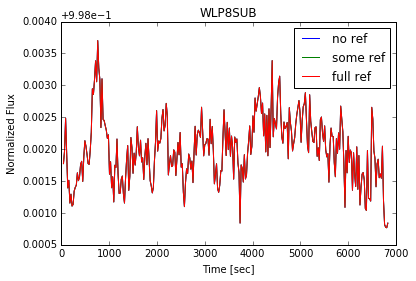

In [64]:
plt.plot(time, no_dt[0][0], label = 'no ref')
plt.plot(time, some_dt[0][0], label = 'some ref')
plt.plot(time, full_dt[0][0], label = 'full ref')
plt.legend(loc = 'best')
plt.title('WLP8SUB')
plt.xlabel('Time [sec]')
plt.ylabel('Normalized Flux')

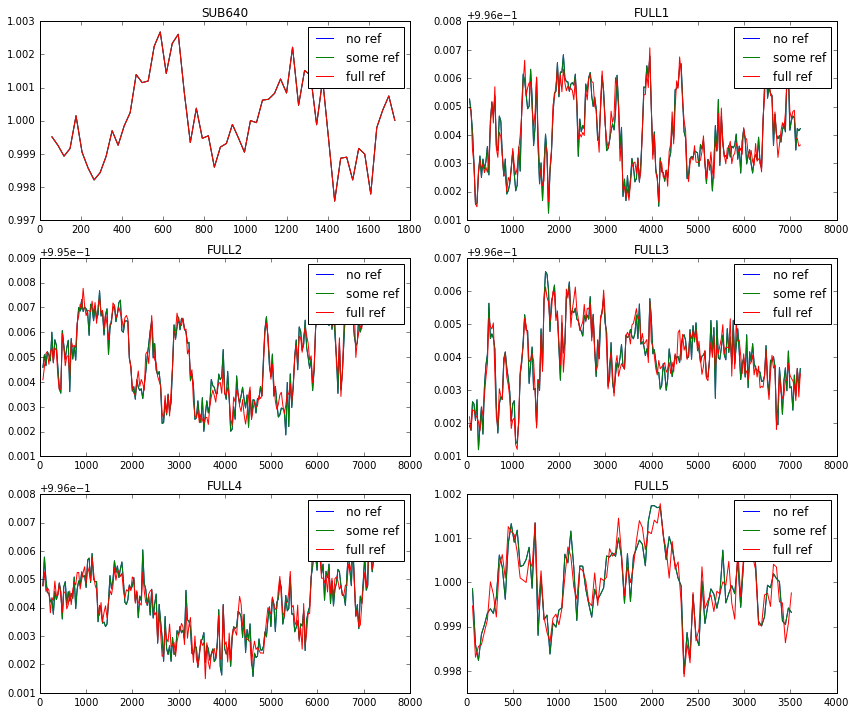

In [89]:
plt.figure(figsize=(12,10))
for i in range(1,7):
    plt.subplot(3, 2, i)
    plt.plot(time[i], no_dt[i][0], label = 'no ref')
    plt.plot(time[i], some_dt[i][0], label = 'some ref')
    plt.plot(time[i], full_dt[i][0], label = 'full ref')
    plt.legend(loc = 'upper right', bbox_to_anchor = (1,1))
    plt.title('%s' % test[i])
#     plt.xlabel('Time [sec]')
#     plt.ylabel('Normalized Flux')
    plt.tight_layout()